In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###Read the data set

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


##Now will drop the unnamed columns as all of them contain nulls <br>
##Change the name of the two remaining columns


In [7]:
df.drop(['Unnamed: 2'	,'Unnamed: 3',	'Unnamed: 4'],axis = 1 , inplace=True)
df.rename(columns= {'v1' : 'label','v2':'message'},inplace= True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##check the nulls and duplicates

In [8]:
df.isnull().sum()

,0
label,0
message,0


In [9]:
df.duplicated().sum()

np.int64(403)

In [10]:
df.drop_duplicates(inplace = True)

##let's see the Visualizing Label Distribution

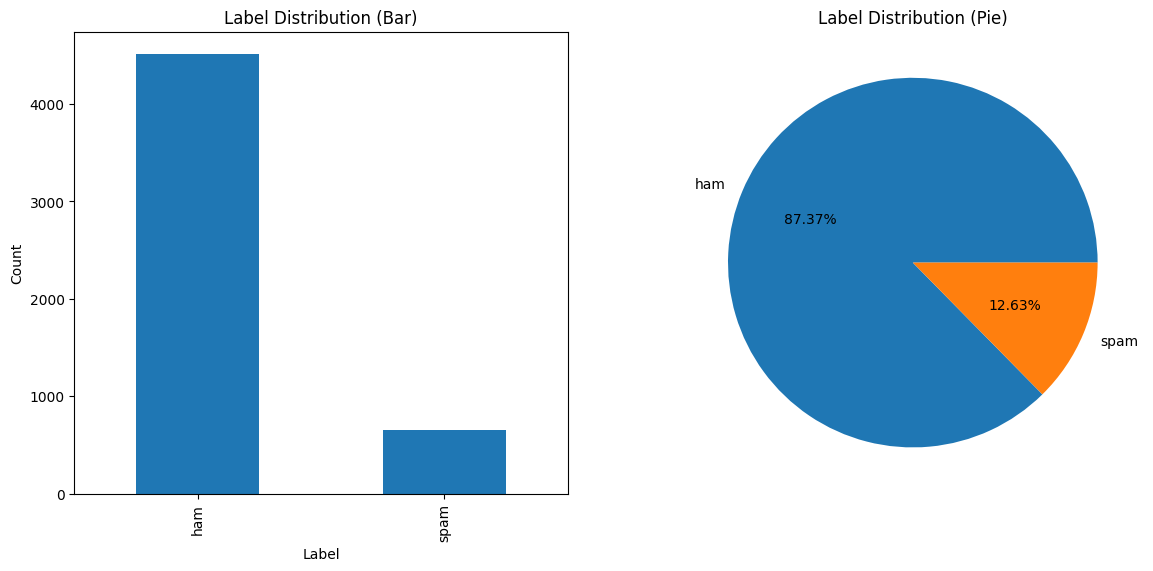

In [11]:
# Create a single figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # width x height

# Bar chart on the first subplot
df['label'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Label Distribution (Bar)')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

# Pie chart on the second subplot
counts = df['label'].value_counts()
labels = df['label'].value_counts().index
axes[1].pie(counts, labels=labels, autopct='%.2f%%')
axes[1].set_title('Label Distribution (Pie)')

plt.show()

##Conclusion: the data has unbalanced classes




In [12]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##Data cleaning and preprocessing

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


# Init the Wordnet Lemmatizer
import re
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))


def clean_text(text,stem):

    # Matches one or more whitespace characters (spaces, tabs, newlines)
    # Used to normalize multiple spaces into a single space.
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)

    # Matches HTML-like tags (e.g., <div>, </p>, <br/>, etc.)
    # Used to remove any HTML tags from the text.
    RE_TAGS = re.compile(r"<[^>]+>")

    # Matches any character that is NOT:
    # - A to Z or a to z (English letters)
    # - À to ž (Latin extended letters — supports accented characters)
    # - A space
    # In other words, this removes numbers, punctuation, emojis, etc.
    RE_ASCII = re.compile(r"[^A-Za-zÀ-ž ]", re.IGNORECASE)

    # Matches any single character word (like "a", "I", or accented equivalents)
    # The \b means word boundary. So this will match only standalone single letters.
    # Useful for removing noise words that aren't meaningful in NLP.
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)


    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)


    for word in word_tokens:
      #convert words to lower case
      word.lower()
      #remove accented words
      #unidecode.unidecode(word)
      #split words like don't to do not
      #contractions.fix(word)


    if stem==True:
      words_filtered = [stemmer.stem(word) for word in word_tokens if word not in stop_words ]
    elif stem==False:
      words_filtered =[lemmatizer.lemmatize(word) for word in word_tokens if word not in stop_words]
    else:
      words_filtered = word_tokens

    text_clean = " ".join(words_filtered)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
df["message"] = df["message"].apply(lambda x: clean_text(x, stem=False))

In [16]:
df

,label,message
0,0,Go jurong point crazy Available bugis great wo...
1,0,Ok lar Joking wif oni
2,1,Free entry wkly comp win FA Cup final tkts st ...
3,0,dun say early hor already say
4,0,Nah think go usf life around though
...,...,...
5567,1,This nd time tried contact Pound prize claim e...
5568,0,Will going esplanade fr home
5569,0,Pity mood So suggestion
5570,0,The guy bitching acted like interested buying ...


In [17]:
df_clean = df.copy()

In [18]:
# Word Frequency of most common words
word_freq = pd.Series(" ".join(df_clean["message"]).split()).value_counts()
word_freq[1:40]

,count
get,338
gt,288
lt,287
go,274
You,268
ur,253
know,244
like,225
day,222
time,215


In [19]:
# list the least 10 words used and set the name of their repetition to "freq"
word_freq[-10:].reset_index(name='freq')

,index,freq
0,accent,1
1,unit,1
2,Pshew,1
3,Mite,1
4,shud,1
5,kane,1
6,Tho,1
7,amore,1
8,Cine,1
9,jurong,1


In [20]:
df_clean['label'].value_counts(normalize=True)

,proportion
label,
0,0.87367
1,0.12633


In [21]:
X=df_clean['message']
y=df_clean['label']

In [22]:
X

,message
0,Go jurong point crazy Available bugis great wo...
1,Ok lar Joking wif oni
2,Free entry wkly comp win FA Cup final tkts st ...
3,dun say early hor already say
4,Nah think go usf life around though
...,...
5567,This nd time tried contact Pound prize claim e...
5568,Will going esplanade fr home
5569,Pity mood So suggestion
5570,The guy bitching acted like interested buying ...


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics


In [24]:
# Further split the original training set to a train and a test set
xtr, xts, ytr, yts = train_test_split(
    X, y, train_size = 0.8, stratify = y, random_state =141)

In [25]:
vectorizer = TfidfVectorizer(
    analyzer="word", max_df=0.3, min_df=10, ngram_range=(1, 3), norm="l2"
)
vectorizer.fit(xtr)

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 3))

In [26]:
# Vector representation of vocabulary
word_vector = pd.Series(vectorizer.vocabulary_).sample(5, random_state=5)
print(f"Sample word (ngram) vector extract:\n\n {word_vector}")

Sample word (ngram) vector extract:

 reach    555
apply     30
set      593
you      798
else     199
dtype: int64


In [27]:
vectorizer.get_feature_names_out()

array(['able', 'abt', 'account', 'account statement', 'actually',
       'address', 'aft', 'after', 'afternoon', 'age', 'ago', 'ah',
       'aight', 'all', 'almost', 'alone', 'already', 'alright', 'also',
       'always', 'am', 'amp', 'an', 'and', 'another', 'answer', 'any',
       'anything', 'anytime', 'anyway', 'apply', 'ard', 'are', 'around',
       'as', 'asap', 'ask', 'asked', 'at', 'attempt', 'attempt contact',
       'await', 'await collection', 'award', 'awarded', 'away', 'awesome',
       'babe', 'baby', 'back', 'bad', 'balance', 'be', 'beautiful', 'bed',
       'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus',
       'bonus caller', 'bonus caller prize', 'book', 'bored', 'bout',
       'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bt', 'bus',
       'busy', 'but', 'buy', 'by', 'call', 'call customer',
       'call customer service', 'call identifier', 'call identifier code',
       'call land', 'call land line', 'call landline', 'call later',
       'ca

In [28]:
print(xtr.shape)
print(len(vectorizer.get_feature_names_out()))

(4135,)
808


In [29]:
# transform each sentence to numeric vector with tf-idf value as elements
xtr_vec = vectorizer.transform(xtr)
xts_vec = vectorizer.transform(xts)
xtr_vec.get_shape()

(4135, 808)

In [30]:
xts_vec.get_shape()

(1034, 808)

In [31]:
# models to test
classifiers = [
    LogisticRegression (random_state=22),
    LinearSVC(random_state=1),
    RandomForestClassifier(random_state=1),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['LogisticRegression', 'LinearSVC', 'RandomForestClassifier']


In [32]:
%%time


# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf_object=clf
    clf.fit(xtr_vec, ytr)
    prediction = clf.predict(xts_vec)
    report = sklearn.metrics.classification_report(yts, prediction)
    results[name] = report

Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier
CPU times: user 1.46 s, sys: 10.7 ms, total: 1.47 s
Wall time: 1.36 s


In [33]:
# Prediction resultsdomForestCl
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")
# p => subscribe , n => will not subscribe
# precision = TP / (TP + FP)
# recall    = TP / (TP + FN)

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       1.00      0.76      0.87       131

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.97      1034


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.87      0.93       131

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       1.00      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.99      0.91  

Confusion Matrix for LogisticRegression:


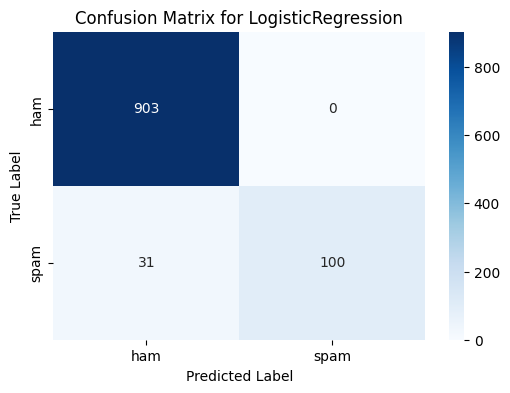

Confusion Matrix for LinearSVC:


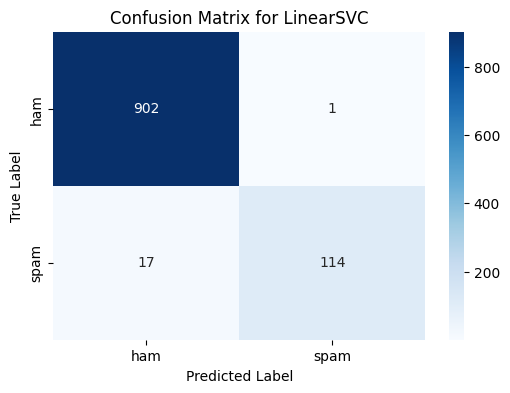

Confusion Matrix for RandomForestClassifier:


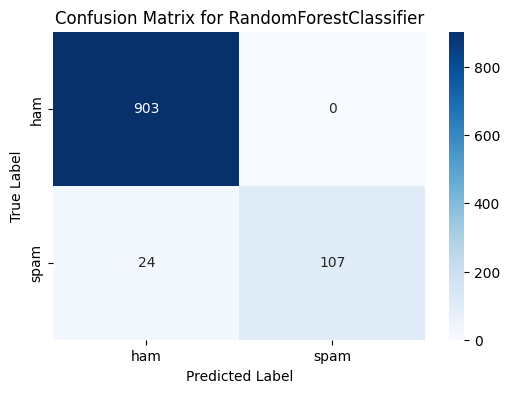

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, clf in zip(names, classifiers):
    print(f"Confusion Matrix for {name}:")
    clf_object = clf
    prediction = clf.predict(xts_vec)
    cm = confusion_matrix(yts, prediction)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#we apply SOMTE as the unblanaced data

In [35]:
from imblearn.over_sampling import SMOTE

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)



In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [37]:
# test all classifiers and save prediction results on test data
results = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")

    # Fit the classifier to the resampled training data
    clf.fit(X_train_resampled, y_train_resampled)

    # Predict on the original test data
    predictions = clf.predict(X_test)

    # Generate classification report
    report = sklearn.metrics.classification_report(y_test, predictions)

    # Store the report
    results[name] = report


Training classifier: LogisticRegression
Training classifier: LinearSVC
Training classifier: RandomForestClassifier


In [38]:
# Prediction resultsdomForestCl
for k, v in results.items():
    print(f"Results for {k}:")
    print(f"{v}\n")
# p => subscribe , n => will not subscribe
# precision = TP / (TP + FP)
# recall    = TP / (TP + FN)

Results for LogisticRegression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       903
           1       0.93      0.88      0.90       131

    accuracy                           0.98      1034
   macro avg       0.95      0.93      0.94      1034
weighted avg       0.98      0.98      0.98      1034


Results for LinearSVC:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.97      0.89      0.93       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Results for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.98      0.91  

Confusion Matrix for LogisticRegression:


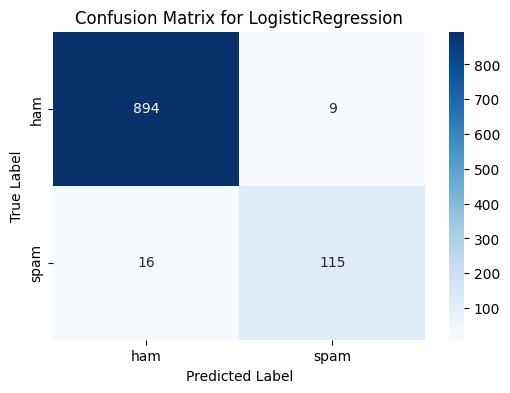

Confusion Matrix for LinearSVC:


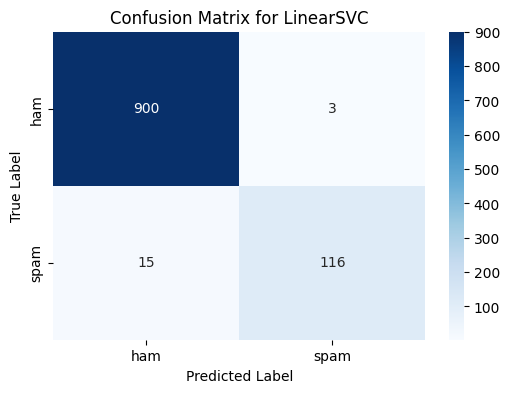

Confusion Matrix for RandomForestClassifier:


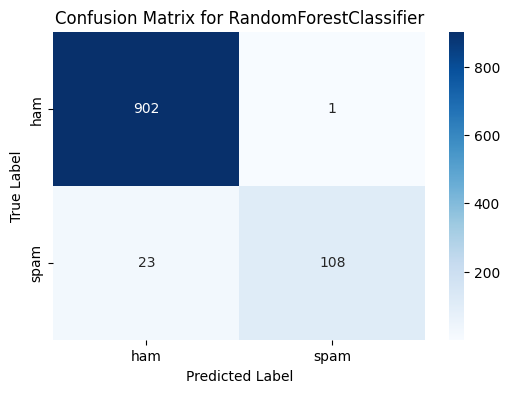

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

for name, clf in zip(names, classifiers):
    print(f"Confusion Matrix for {name}:")

    # Predict on test set
    predictions = clf.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)

    # Plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
